<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,33.167425,20.451542,57.610519,69.247182,185.989804,376.466472,1217.042539,-840.576067
1,0.0,1.0,41.126954,84.967559,26.017422,30.006757,-2034.643539,-1842.524847,-161.100208,-1681.424639
2,0.0,2.0,88.370668,21.250192,65.327699,29.746001,152.702820,367.397380,670.092700,-302.695321
3,0.0,3.0,40.824262,82.424641,65.649980,42.161943,2211.859410,2452.920236,-458.492431,2911.412667
4,0.0,4.0,83.953335,21.033214,39.920675,73.079346,380.664494,608.651064,188.252215,420.398848
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,28.312330,81.460225,24.445282,47.950296,-2497.616407,-2305.448273,-472.562190,-1832.886084
29996,999.0,26.0,29.076634,96.041929,65.062973,47.752543,-1485.442575,-1237.508496,-1.924702,-1235.583794
29997,999.0,27.0,47.584300,51.349900,68.349486,70.838164,-302.607470,-54.485621,-154.785235,100.299614
29998,999.0,28.0,53.468968,84.325229,65.581400,95.842389,-3222.486800,-2913.268814,-409.282357,-2503.986457


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    33.167425  20.451542  57.610519  69.247182   185.989804   
      1.0    41.126954  84.967559  26.017422  30.006757 -2034.643539   
      2.0    88.370668  21.250192  65.327699  29.746001   152.702820   
      3.0    40.824262  82.424641  65.649980  42.161943  2211.859410   
      4.0    83.953335  21.033214  39.920675  73.079346   380.664494   
...                ...        ...        ...        ...          ...   
999.0 25.0   28.312330  81.460225  24.445282  47.950296 -2497.616407   
      26.0   29.076634  96.041929  65.062973  47.752543 -1485.442575   
      27.0   47.584300  51.349900  68.349486  70.838164  -302.607470   
      28.0   53.468968  84.325229  65.581400  95.842389 -3222.486800   
      29.0   56.872519  82.183749  27.925734  62.158575 -1273.478865   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     376.466472  1217.042539  -840.576067  
      1.0   -1842.524847  -161.100208 -1681.424639  
      2.0     367.397380   670.092700  -302.695321  
      3.0    2452.920236  -458.492431  2911.412667  
      4.0     608.651064   188.252215   420.398848  
...                  ...          ...          ...  
999.0 25.0  -2305.448273  -472.562190 -1832.886084  
      26.0  -1237.508496    -1.924702 -1235.583794  
      27.0    -54.485621  -154.785235   100.299614  
      28.0  -2913.268814  -409.282357 -2503.986457  
      29.0  -1034.338288   -39.726263  -994.612025  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    33.167425  20.451542  57.610519  69.247182   185.989804   
      1.0    41.126954  84.967559  26.017422  30.006757 -2034.643539   
      2.0    88.370668  21.250192  65.327699  29.746001   152.702820   
      3.0    40.824262  82.424641  65.649980  42.161943  2211.859410   
      4.0    83.953335  21.033214  39.920675  73.079346   380.664494   
...                ...        ...        ...        ...          ...   
999.0 25.0   28.312330  81.460225  24.445282  47.950296 -2497.616407   
      26.0   29.076634  96.041929  65.062973  47.752543 -1485.442575   
      27.0   47.584300  51.349900  68.349486  70.838164  -302.607470   
      28.0   53.468968  84.325229  65.581400  95.842389 -3222.486800   
      29.0   56.872519  82.183749  27.925734  62.158575 -1273.478865   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     376.466472  1217.042539  -840.576067  
      1.0   -1842.524847  -161.100208 -1681.424639  
      2.0     367.397380   670.092700  -302.695321  
      3.0    2452.920236  -458.492431  2911.412667  
      4.0     608.651064   188.252215   420.398848  
...                  ...          ...          ...  
999.0 25.0  -2305.448273  -472.562190 -1832.886084  
      26.0  -1237.508496    -1.924702 -1235.583794  
      27.0    -54.485621  -154.785235   100.299614  
      28.0  -2913.268814  -409.282357 -2503.986457  
      29.0  -1034.338288   -39.726263  -994.612025  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,33.167425,20.451542,57.610519,69.247182,185.989804,376.466472,1217.042539,-840.576067
1,0.0,1.0,41.126954,84.967559,26.017422,30.006757,-2034.643539,-1842.524847,-161.100208,-1681.424639
2,0.0,2.0,88.370668,21.250192,65.327699,29.746001,152.702820,367.397380,670.092700,-302.695321
3,0.0,3.0,40.824262,82.424641,65.649980,42.161943,2211.859410,2452.920236,-458.492431,2911.412667
4,0.0,4.0,83.953335,21.033214,39.920675,73.079346,380.664494,608.651064,188.252215,420.398848
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,28.312330,81.460225,24.445282,47.950296,-2497.616407,-2305.448273,-472.562190,-1832.886084
29996,999.0,26.0,29.076634,96.041929,65.062973,47.752543,-1485.442575,-1237.508496,-1.924702,-1235.583794
29997,999.0,27.0,47.584300,51.349900,68.349486,70.838164,-302.607470,-54.485621,-154.785235,100.299614
29998,999.0,28.0,53.468968,84.325229,65.581400,95.842389,-3222.486800,-2913.268814,-409.282357,-2503.986457


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    33.167425  20.451542  57.610519  69.247182   185.989804   
      1.0    41.126954  84.967559  26.017422  30.006757 -2034.643539   
      2.0    88.370668  21.250192  65.327699  29.746001   152.702820   
      3.0    40.824262  82.424641  65.649980  42.161943  2211.859410   
      4.0    83.953335  21.033214  39.920675  73.079346   380.664494   
...                ...        ...        ...        ...          ...   
999.0 25.0   28.312330  81.460225  24.445282  47.950296 -2497.616407   
      26.0   29.076634  96.041929  65.062973  47.752543 -1485.442575   
      27.0   47.584300  51.349900  68.349486  70.838164  -302.607470   
      28.0   53.468968  84.325229  65.581400  95.842389 -3222.486800   
      29.0   56.872519  82.183749  27.925734  62.158575 -1273.478865   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     376.466472  1217.042539  -840.576067  
      1.0   -1842.524847  -161.100208 -1681.424639  
      2.0     367.397380   670.092700  -302.695321  
      3.0    2452.920236  -458.492431  2911.412667  
      4.0     608.651064   188.252215   420.398848  
...                  ...          ...          ...  
999.0 25.0  -2305.448273  -472.562190 -1832.886084  
      26.0  -1237.508496    -1.924702 -1235.583794  
      27.0    -54.485621  -154.785235   100.299614  
      28.0  -2913.268814  -409.282357 -2503.986457  
      29.0  -1034.338288   -39.726263  -994.612025  

[30000 rows x 8 columns]

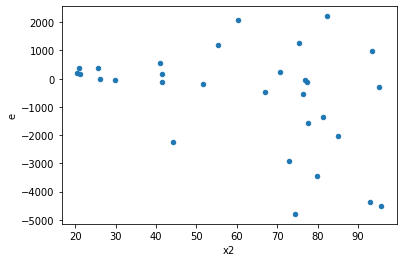

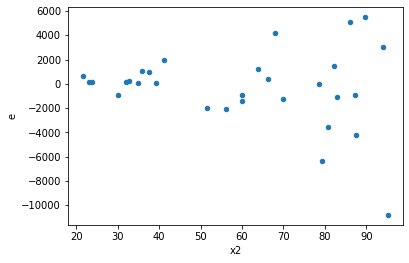

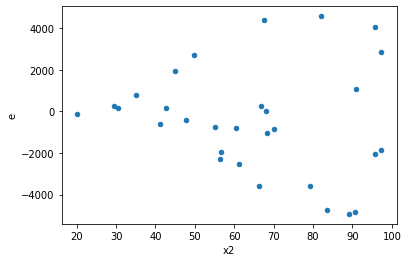

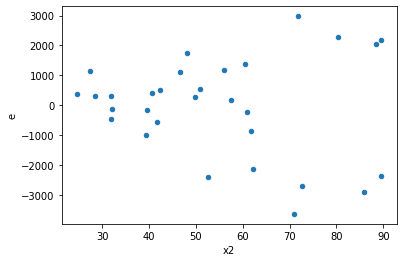

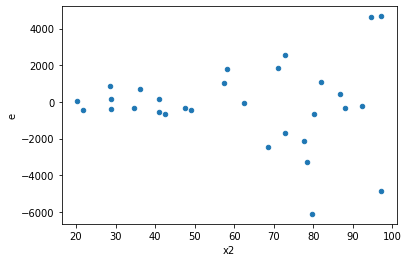

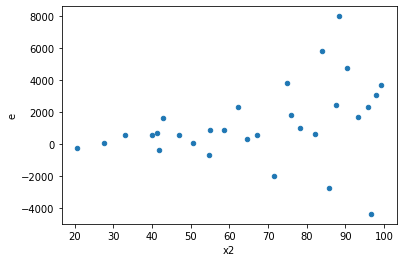

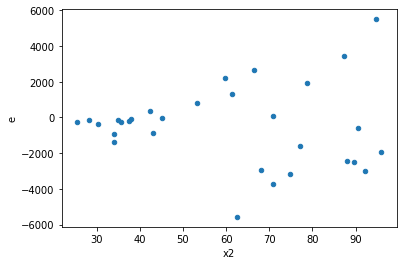

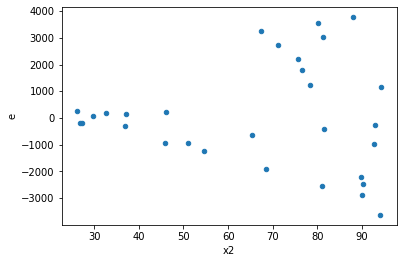

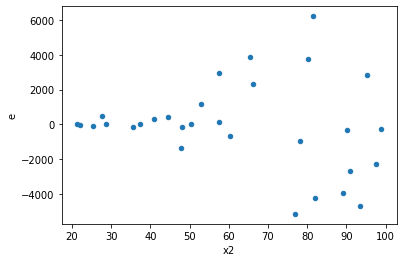

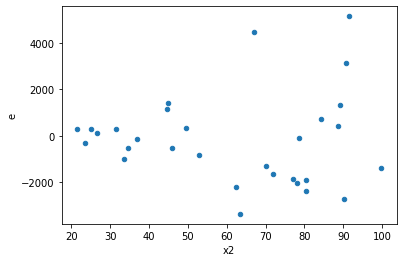

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,12.0,37254819.97860425,119499045.67734674,3725481.997860425,9958253.806445561,2.673010851257547,0.10995219133409884,0.9450239043329506,0.05497609566704942,Reject001=1 : Homoscedasticity
3.0,6.0,16.0,9421675.972262973,54256938.66999127,1570279.3287104955,3391058.6668744544,2.159525763902893,0.20481797269158064,0.8975910136542097,0.10240898634579032,Reject001=1 : Homoscedasticity
4.0,9.0,13.0,12141806.420103593,90287524.46049343,1349089.6022337326,6945194.189268725,5.148059978943826,0.008299893542826897,0.9958500532285866,0.004149946771413449,Reject001=0 : Heteroscedasticity
5.0,13.0,9.0,18429599.237614635,44051358.91854136,1417661.4798165103,4894595.435393484,3.452584065433588,0.06902783478658825,0.9654860826067059,0.034513917393294125,Reject001=1 : Homoscedasticity
6.0,7.0,15.0,34636901.49442991,92588352.4888973,4948128.784918559,6172556.832593153,1.2474527444407952,0.6766289927742766,0.6616855036128617,0.3383144963871383,Reject001=1 : Homoscedasticity
9.0,10.0,12.0,16528670.47080139,90283675.02931723,1652867.0470801392,7523639.585776436,4.55187221444536,0.01584398451587976,0.9920780077420601,0.00792199225793988,Reject001=1 : Homoscedasticity
13.0,20.0,2.0,12294379.756119382,14660069.14730447,614718.9878059691,7330034.573652235,11.92420393554835,0.16024237649529827,0.9198788117523509,0.08012118824764913,Reject001=1 : Homoscedasticity
14.0,5.0,17.0,7876493.911268176,52215790.26394694,1575298.782253635,3071517.07434982,1.949799688130072,0.2770622346117324,0.8614688826941338,0.1385311173058662,Reject001=1 : Homoscedasticity
16.0,10.0,12.0,2066281.4311296158,36156482.129183695,206628.14311296158,3013040.1774319746,14.581944802092012,6.202445749825536e-05,0.9999689877712509,3.101222874912768e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,7.0,41888699.09264954,5395969.124899094,2792579.9395099697,770852.732128442,0.2760360486811017,0.0346276872832274,Reject001=1 : Homoscedasticity
1.0,10.0,12.0,37254819.97860425,119499045.67734674,3725481.997860425,9958253.806445561,2.673010851257547,0.10995219133409884,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,125124428.92915562,46874479.47077378,11374948.084468693,4261316.315524889,0.37462292433169636,0.11828199359460671,Reject001=1 : Homoscedasticity
3.0,6.0,16.0,9421675.972262973,54256938.66999127,1570279.3287104955,3391058.6668744544,2.159525763902893,0.20481797269158064,Reject001=1 : Homoscedasticity
4.0,9.0,13.0,12141806.420103593,90287524.46049343,1349089.6022337326,6945194.189268725,5.148059978943826,0.008299893542826897,Reject001=0 : Heteroscedasticity
5.0,13.0,9.0,18429599.237614635,44051358.91854136,1417661.4798165103,4894595.435393484,3.452584065433588,0.06902783478658825,Reject001=1 : Homoscedasticity
6.0,7.0,15.0,34636901.49442991,92588352.4888973,4948128.784918559,6172556.832593153,1.2474527444407952,0.6766289927742766,Reject001=1 : Homoscedasticity
7.0,10.0,12.0,35106492.28622595,32668304.653783962,3510649.2286225953,2722358.7211486637,0.7754573424633432,0.6966442016372091,Reject001=1 : Homoscedasticity
8.0,19.0,3.0,124456910.24203214,2761084.6697455402,6550363.69694906,920361.5565818468,0.1405054130063832,0.004271616778208533,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      771
Reject001=0 : Heteroscedasticity    229
Name: Result_test, dtype: int64